In [1]:
from felpy.utils.daq_utils import load_data, shimadzu_reshape
from extra_data import open_run, RunDirectory, H5File
import numpy as np
from matplotlib import pyplot as plt
from felpy.exp.shimadzu.shimadzu_tools import create_gif

In [39]:
proposal = '2717'
run_str = '120'

run = open_run(proposal, run_str)
run.info()

source = "SPB_EXP_ZYLA/CAM/2:daqOutput"

sel = run.select(source, 'data.image.pixels')
tid, data = sel.train_from_id(873501145+2738)
exp = data['SPB_EXP_ZYLA/CAM/2:daqOutput']['data.image.pixels'] 

# of trains:    20738
Duration:       0:34:33.8
First train ID: 873501145
Last train ID:  873521882

0 detector modules ()

4 instrument sources (excluding detectors):
  - SA1_XTD2_XGM/XGM/DOOCS:output
  - SPB_EXP_ZYLA/CAM/2:daqOutput
  - SPB_RR_SYS/TSYS/X2TIMER2:outputBunchPattern
  - SPB_XTD9_XGM/XGM/DOOCS:output

16 control sources: (1 entry per train)
  - ACC_SYS_DOOCS/CTRL/BEAMCONDITIONS
  - SA1_XTD2_ATT/MDL/MAIN
  - SA1_XTD2_MIRR-1/MOTOR/HMRY
  - SA1_XTD2_XGM/XGM/DOOCS
  - SPB_IRD_SACT/CTRL/MCS2
  - SPB_IRD_SACT/MOTOR/AXIS0
  - SPB_IRD_SACT/MOTOR/AXIS1
  - SPB_IRD_SACT/MOTOR/AXIS11
  - SPB_IRD_SACT/MOTOR/AXIS12
  - SPB_IRD_SACT/MOTOR/AXIS13
  - SPB_IRD_SACT/MOTOR/AXIS14
  - SPB_IRD_SACT/MOTOR/AXIS7
  - SPB_RR_SYS/MDL/BUNCH_PATTERN
  - SPB_RR_SYS/TSYS/X2TIMER2
  - SPB_XTD9_ATT/MDL/MAIN
  - SPB_XTD9_XGM/XGM/DOOCS



In [26]:
# -*- coding: utf-8 -*-
import numpy as np
from matplotlib import pyplot as plt
from felpy.model.src.coherent import construct_SA1_wavefront

from wpg.optical_elements import Drift
from felpy.model.beamline import Beamline
from felpy.model.beamlines.exfel_spb.exfel_spb import Instrument, propagation_parameters
from felpy.model.beamlines.exfel_spb.methods import get_beamline_object

from wpg.srwl_uti_smp import srwl_opt_setup_transm_from_file as Sample


In [27]:
def propThruMaskLite(wfr, _x = 0, _y = 0):
    """
    propagate through the speckle generator
    """
    s = Sample("/gpfs/exfel/data/user/guestt/FELpy/felpy/data/samples/speckle.tif", 
               rx = 100e-06/1000, ry = 100e-06/1000,
               thickness = 60e-06,
               delta = 3.35e-03,
               atten_len = 20e-06,
               xc = 0, yc = 0,
               shift_x = _y, shift_y = _x)


    bl = Beamline()
    bl.append(s, propagation_parameters(1,1,1,1,mode = 'fresnel'))
    bl.propagate(wfr)
    
    return wfr
    
def z_eff(z1,z2):
    return z1*z2/(z1+z2)
    

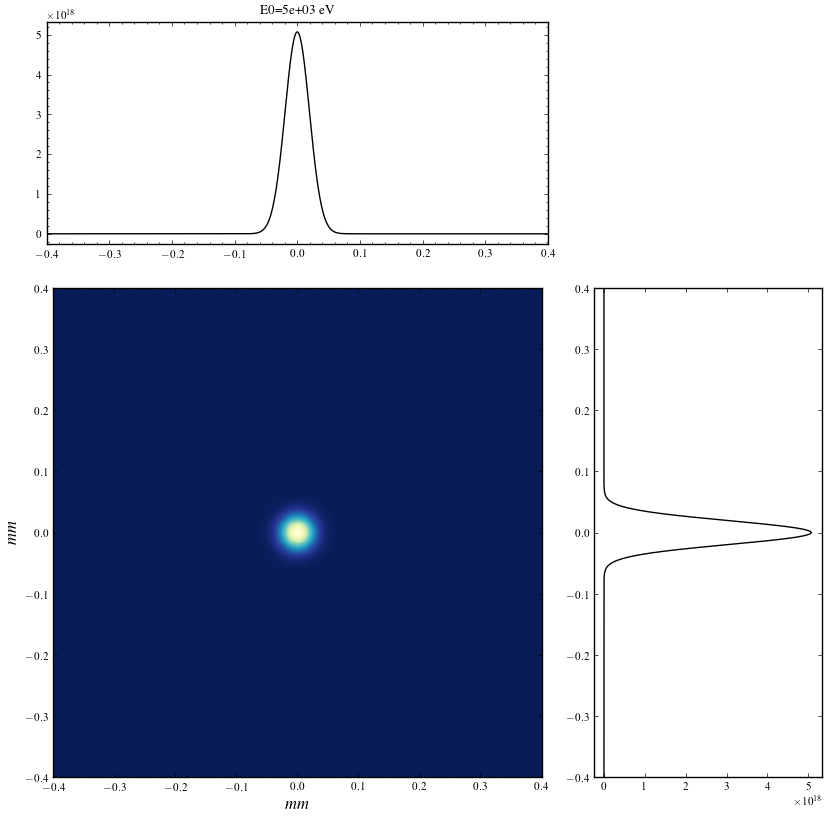

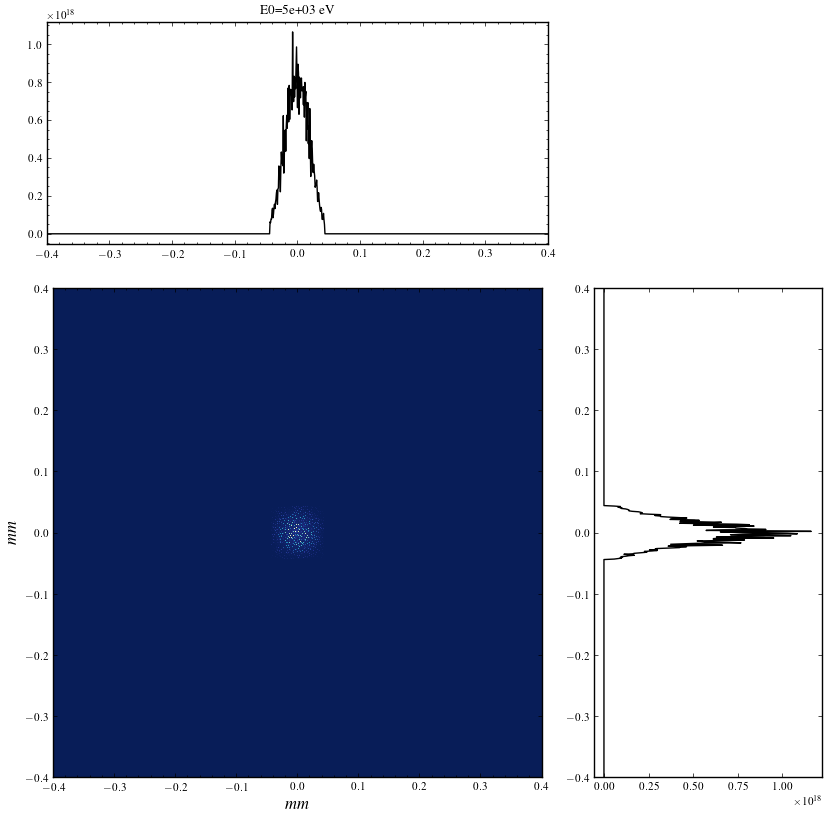

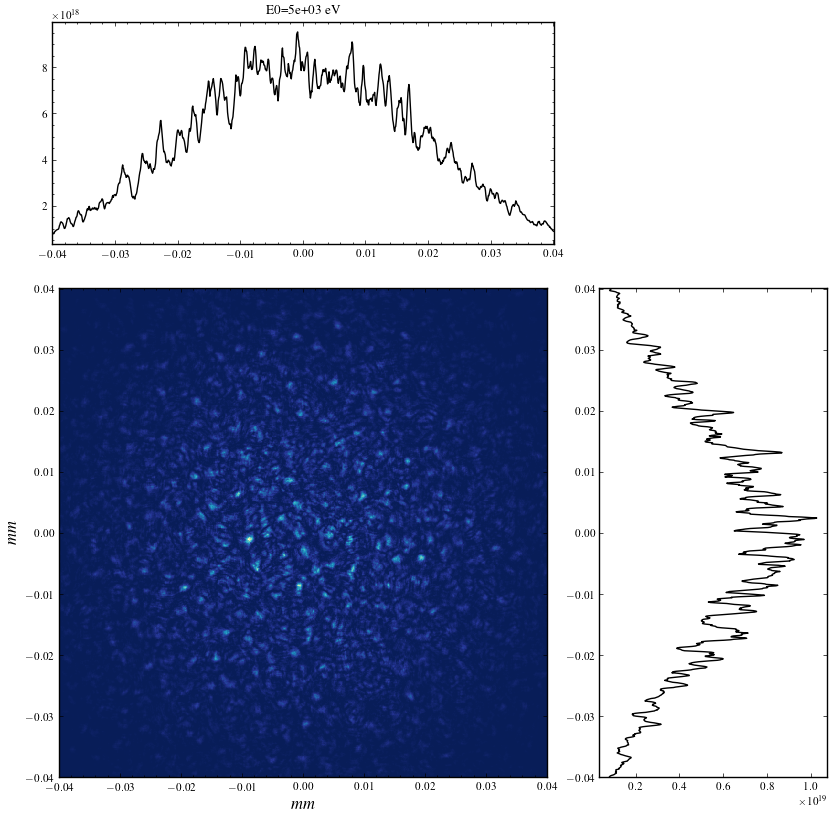

In [28]:
z = z_eff(8e-03, 3.5)
from wpg.wpg_uti_wf import plot_intensity_map as plotIntensity

wfr = construct_SA1_wavefront(1024,1024,5,0.25)

#bl = get_beamline_object(crop = "NVE")
#bl.append(Drift(2.2+1), propagation_parameters(2, 1, 2, 1, mode = 'quadratic'))
#bl.propagate(wfr)
plotIntensity(wfr)
#plotIntensity(wfr)
# print("Pixel Size: {}".format(wfr.get_spatial_resolution()))
propThruMaskLite(wfr)
plotIntensity(wfr)

bl = Beamline()
bl.append(Drift(z), propagation_parameters(1/10,1,1/10,1, 'quadratic'))
bl.propagate(wfr)
plotIntensity(wfr)

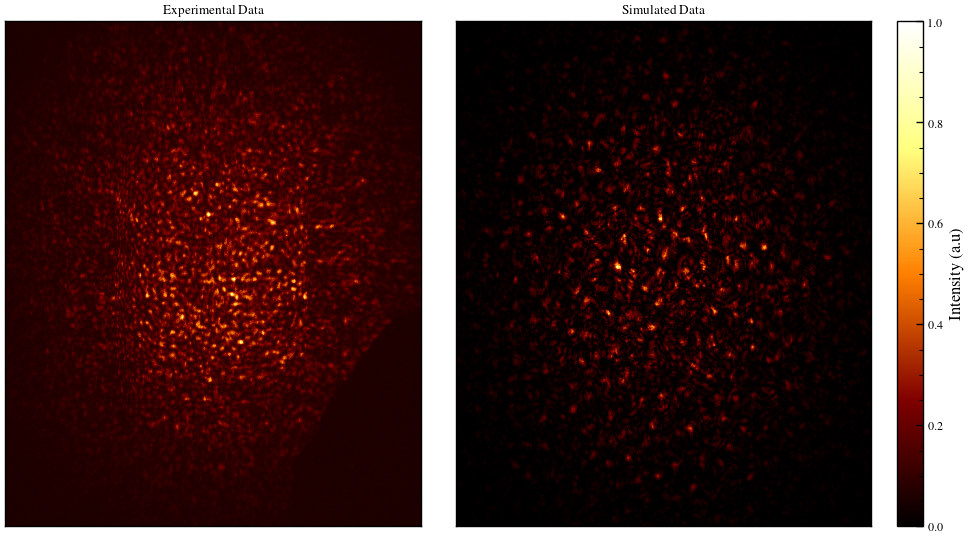

In [69]:
from felpy.utils.vis_utils import Grids

plot = Grids(global_aspect = 2, scale = 2)
plot.create_grid(n = 1, m = 2, sharex = False, sharey = False)
[ax1, ax2] = plot.axes

for ax in plot.axes:
    pass
    ax.set_xticks([])
    ax.set_yticks([])



ax1.set_title("Experimental Data")
ax1.imshow(exp, cmap = 'afmhot')
ax1.set_aspect('auto')

ax2.set_title("Simulated Data")
ax2.imshow(wfr.get_intensity().sum(-1), cmap = 'afmhot')
ax2.set_aspect('auto')

plot.add_global_colorbar(cmap = 'afmhot', clabel = "Intensity (a.u)")